# EQUITY DIGITAL ASSET-OR-NOTHING OPTION

Valuation and Risk of Equity Digital Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils.FinDate import FinDate
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat
from financepy.products.equity.FinEquityDigitalOption import FinEquityDigitalOption
from financepy.products.equity.FinEquityDigitalOption import FinDigitalOptionTypes
from financepy.products.equity.FinEquityModelTypes import FinEquityModelBlackScholes
from financepy.finutils.FinOptionTypes import FinOptionTypes

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT     #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



# Asset-or-Nothing Digital Option

I define a digital call and a digital put option.

In [3]:
underlyingType = FinDigitalOptionTypes.ASSET_OR_NOTHING

In [4]:
expiryDate = FinDate(1, 1, 2008)

In [5]:
strikePrice = 65.0

In [6]:
digitalCall = FinEquityDigitalOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL, underlyingType)

In [7]:
digitalPut = FinEquityDigitalOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT, underlyingType)

In [8]:
print(digitalCall)

EXPIRY DATE: TUE 1 JAN 2008
BARRIER LEVEL: 65.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
UNDERLYING TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


In [9]:
print(digitalPut)

EXPIRY DATE: TUE 1 JAN 2008
BARRIER LEVEL: 65.0
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT
UNDERLYING TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


## Valuation

In [10]:
valueDate = FinDate(1, 7, 2007)

In [11]:
interestRate = 0.07

In [12]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [13]:
volatility = 0.27

In [14]:
model = FinEquityModelBlackScholes(volatility)

In [15]:
stockPrice = 70.0
dividendYield = 0.05

In [16]:
digitalCall.value(valueDate, stockPrice, discountCurve, dividendYield, model)

48.034435737419805

In [17]:
digitalPut.value(valueDate, stockPrice, discountCurve, dividendYield, model)

20.22437106255941

## Check Monte-Carlo

In [18]:
digitalCall.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, 50000)

48.076809258798335

In [19]:
digitalPut.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, 50000)

20.183429397333768

## Vectorisations

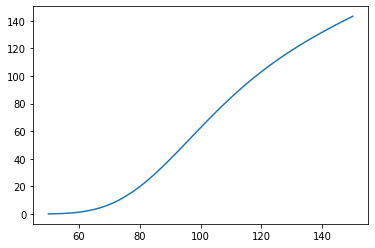

In [18]:
stockPrices = np.linspace(50,150,100)
v = digitalCall.value(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, v);

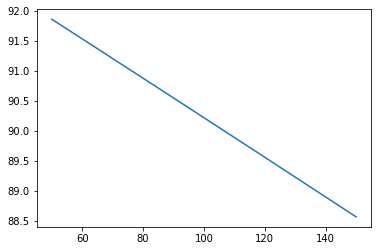

In [19]:
dividendYields = np.linspace(0,0.02,100)
v = digitalCall.value(valueDate, stockPrice, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

We can vectorise two things at the same time as long as they have the same length

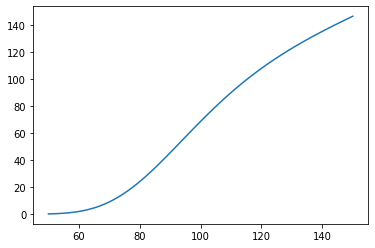

In [20]:
stockPrices = np.linspace(50,150,100)
dividendYields = np.linspace(0, 0.02 , 100)
v = digitalCall.value(valueDate, stockPrices, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

And we can do the same to the option delta.

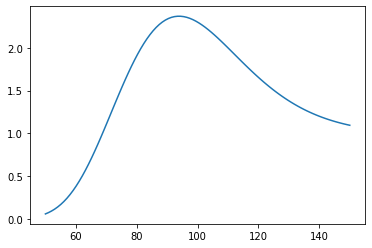

In [21]:
stockPrices = np.linspace(50,150,100)
dividendYields = np.linspace(0, 0.02 , 100)
v = digitalCall.delta(valueDate, stockPrices, discountCurve, dividendYields, model)
plt.plot(stockPrices, v);

## Risk Analysis

The analytical model produced the following sensitivities

In [20]:
digitalCall.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

2.4453895292708694

In [21]:
digitalCall.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

-0.04504130401983275

In [22]:
digitalCall.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

8.01579964584814

In [23]:
digitalCall.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

-30.006723853119865

In [24]:
digitalCall.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

62.032066807091724

Copyright (c) 2020 Dominic O'Kane